#1. Mount Drive

from google.colab import drive
drive.mount('/gdrive')

!ls -al '/gdrive/My Drive/data'

2. Korean Characters

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 전역 폰트 설정
plt.rc('font', family='NanumGothic') 

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
# file = "/gdrive/My Drive/data/data_2020.csv"
file = "data/data_2020.csv"
data = pd.read_csv(file)

In [5]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


#4. 집계시

In [7]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [8]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
82028,20200715,6,101,140,16775,2
125225,20201026,6,101,110,5101,0
66049,20200609,6,101,105,713,1
66048,20200609,6,101,105,816,1
76951,20200704,6,101,135,10050,5
...,...,...,...,...,...,...
74174,20200628,22,101,105,765,6
74175,20200628,22,101,105,870,6
74176,20200628,22,101,105,849,6
107489,20200915,22,101,115,6371,1


In [9]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [10]:
data_06_22_counting

13    7092
14    7091
12    7089
15    7078
11    7059
10    7038
16    7011
9     7008
17    6919
8     6849
18    6742
19    6627
7     6614
20    6518
21    6284
22    6130
6     6095
Name: 집계시, dtype: int64

In [11]:
# Store index of data_06_22_counting into x
x = data_06_22_counting.index

In [12]:
# Conver x values to String in order to avoid int sorting
x = [str(i) for i in x]

In [13]:
x

['13',
 '14',
 '12',
 '15',
 '11',
 '10',
 '16',
 '9',
 '17',
 '8',
 '18',
 '19',
 '7',
 '20',
 '21',
 '22',
 '6']

In [14]:
# Store values of data_06_22_counting into y
y = data_06_22_counting.values

In [15]:
# Calculate ratio and accumulated ratio
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

[0.  0.2 0.4 0.6 0.8 1.  1.2]


C:\Users\inhwa\AppData\Local\Temp/ipykernel_18904/2594643994.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])


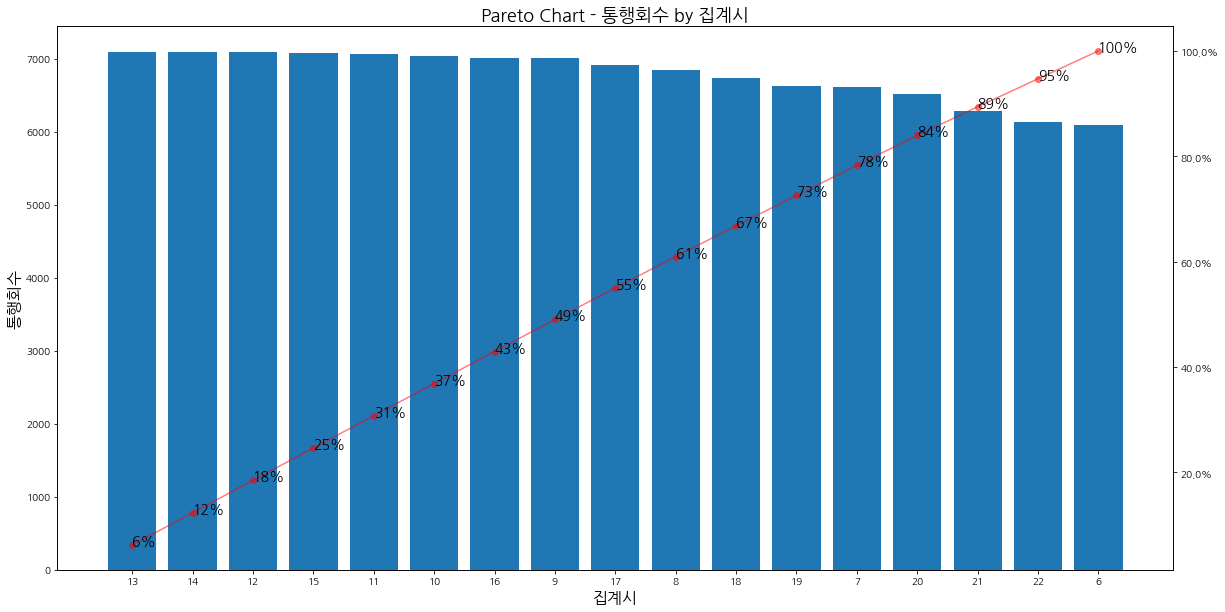

In [16]:
# Configure figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Creae bar Chart
barChart.bar(x, y)
# Creae line Chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)
# Creae right side labels
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Creae annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)  
# Generate labels and title
barChart.set_xlabel('집계시', fontdict= {'size':16})
barChart.set_ylabel('통행회수', fontdict= {'size':16})
plt.title('Pareto Chart - 통행회수 by 집계시', fontsize=18)
# Show plot
plt.show()

#5. 도착영업소코드

In [17]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [18]:
data_destination_counting

105    49738
110    38526
115    26354
140     8954
130     7793
135     7428
125     7339
120     6738
Name: 도착영업소코드, dtype: int64

In [19]:
# Store index of data_destination_counting into x
x = data_destination_counting.index

In [20]:
# Conver x values to String in order to avoid int sorting
x = [str(i) for i in x]

In [21]:
# Store values of data_destination_counting into y
y = data_destination_counting.values

In [22]:
# Calculate ratio and accumulated ratio
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


C:\Users\inhwa\AppData\Local\Temp/ipykernel_18904/2864205602.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])


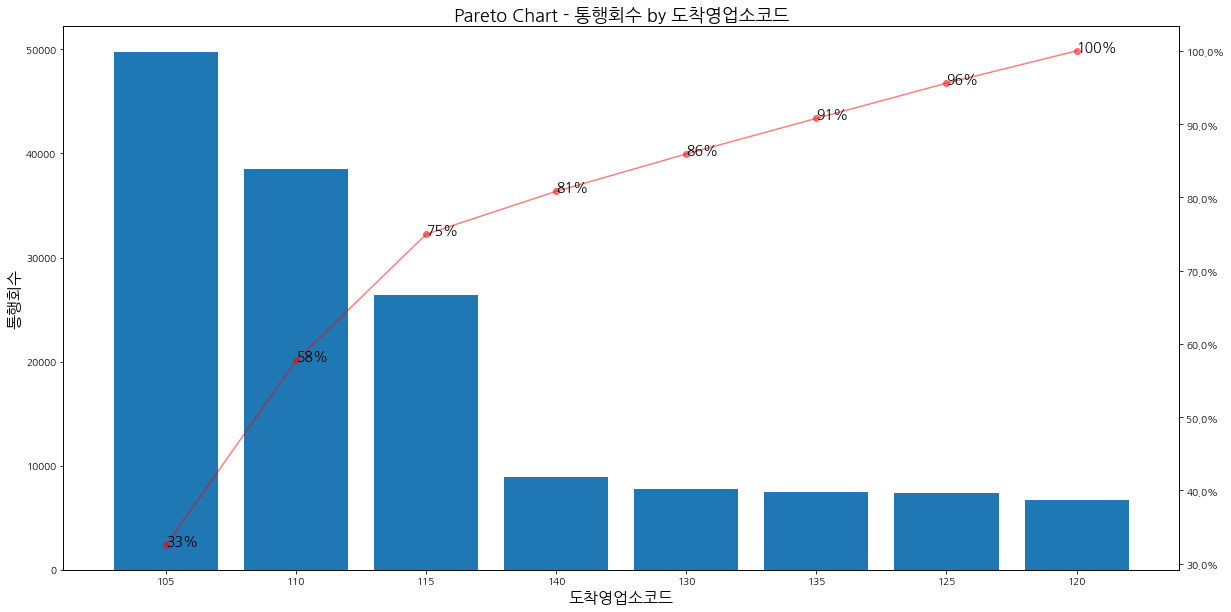

In [23]:
# Configure figure size
fig, barChart = plt.subplots(figsize=(20,10))
# Creae bar Chart
barChart.bar(x, y)
# Creae line Chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)
# Creae right side labels
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])
# Creae annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)    
# Generate labels and title
barChart.set_xlabel('도착영업소코드', fontdict= {'size':16})
barChart.set_ylabel('통행회수', fontdict= {'size':16})
plt.title('Pareto Chart - 통행회수 by 도착영업소코드', fontsize=18)
# Show plot
plt.show()